In [1]:
# Import required libraries
import pandas as pd  # Used for data manipulation and analysis
import statsmodels.api as sm  # Provides classes and functions for the estimation of many different statistical models
from sklearn.model_selection import train_test_split  # Function to split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score, confusion_matrix  # Import accuracy measurement and confusion matrix calculation functions
from sklearn.metrics import roc_curve, roc_auc_score  # Import functions for Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) score
import matplotlib.pyplot as plt  # For generating plots

In [2]:
# Load and prepare the dataset
t_df = pd.read_csv('titanic_data.csv', index_col='PassengerId')  # Load the Titanic dataset, setting 'PassengerId' as the index
t_df.dropna(inplace=True)  # Remove rows with any missing values to ensure data integrity for modeling

In [3]:
# Data preprocessing
t_df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)  # Remove columns that are not needed for prediction to simplify the model

# Convert categorical variables into numerical format for model compatibility
t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)  # Convert 'Sex' into binary variables (male=1, female=0)
t_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)  # Map 'Embarked' ports to numerical values for model processing

In [4]:
# Feature selection and dataset splitting
X = t_df.drop(columns=['Survived'])  # Define feature variables (independent variables)
y = t_df['Survived']  # Define the target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  # Split data into 70% training and 30% testing sets

In [5]:
# Model fitting
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)  # Fit a logistic regression model using the training set
print(logmodel.summary())  # Display the summary statistics of the logistic regression model

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  128
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            7
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.3424
Time:                        22:49:49   Log-Likelihood:                -53.270
converged:                       True   LL-Null:                       -81.004
Covariance Type:            nonrobust   LLR p-value:                 1.204e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7926      1.573      3.684      0.000       2.710       8.875
Pclass        -0.6465      0.522     -1.239      0.215      -1.669       0.376
Sex           -2.9161      0.600     -4.860      0.0

In [6]:
# Predictions and model evaluation
predictions = logmodel.predict(sm.add_constant(X_test))  # Predict survival using the test set
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]  # Convert probabilities to binary outcomes based on a threshold of 0.5

In [7]:
# Calculate and print accuracy and confusion matrix to evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, bin_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, bin_predictions))

Accuracy Score: 0.7272727272727273
Confusion Matrix:
 [[12  6]
 [ 9 28]]


In [8]:
# Calculate and plot ROC curve and AUC score to evaluate the model's ability to distinguish between classes
fpr, tpr, thresholds = roc_curve(y_test, predictions)  # Calculate False Positive Rate, True Positive Rate, and thresholds
roc_auc = roc_auc_score(y_test, predictions)  # Calculate the Area Under the Curve (AUC) for ROC

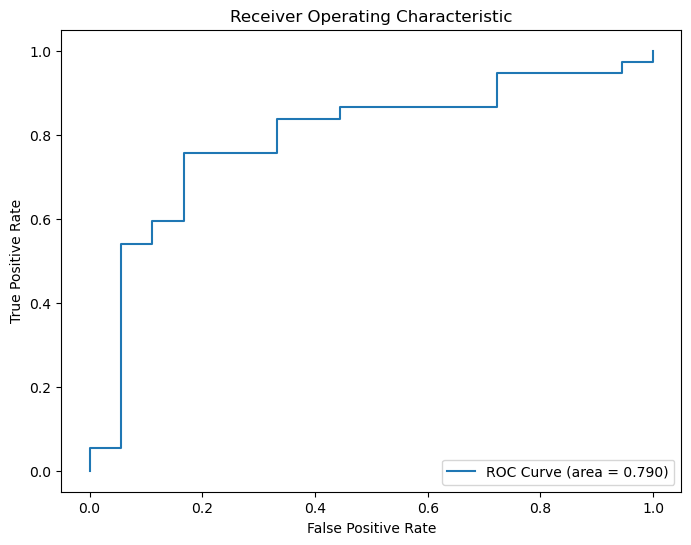

In [9]:
# Plotting ROC curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.3f})')  # Plot the ROC curve
plt.title('Receiver Operating Characteristic')  # Title of the plot
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.legend(loc="lower right")  # Position the legend
plt.show()  # Display the plot

In [10]:
# Plotting the ROC curve is useful for evaluating the model's diagnostic ability. It shows the trade-off between the True Positive Rate (sensitivity)
# and False Positive Rate (1-specificity) at various threshold settings. The AUC (Area Under the Curve) quantifies the overall ability of the model
# to distinguish between the positive and negative classes irrespective of the threshold. A higher AUC indicates a better model performance.
# Specifically, it helps in identifying the right balance between catching as many true positives as possible while minimizing false positives,
# which is crucial in scenarios where the costs of false negatives and false positives are significantly different.

In [11]:
# An AUC (Area Under the ROC Curve) of 0.754 (like in this example) suggests that the logistic regression model has a good
# ability to distinguish between passengers who survived and those who did not. It means there's approximately a 75.4% chance that the model will
# correctly differentiate between a random pair of positive (survived) and negative (not survived) instances. While not perfect, an AUC closer to 1
# indicates strong predictive performance, and an AUC of 0.754 is considered acceptable, showing the model has a reasonable degree of discrimination
# between positive and negative outcomes in the context of the Titanic dataset.
